In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:\Patient dataset-clustering\patient_dataset.csv")
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,Rural,Non-Smoker
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,Urban,Non-Smoker
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,Urban,Non-Smoker
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,Urban,Non-Smoker


In [154]:
df.isnull().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [155]:
df.dropna(inplace=True)

In [156]:
df.isna().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

In [157]:
df.duplicated().sum()

np.int64(0)

In [158]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

Skewness of each column:
age                  0.022298
gender               0.019291
chest_pain_type     -0.004936
blood_pressure       0.111119
cholesterol          0.021390
max_heart_rate      -0.018198
exercise_angina      0.019291
plasma_glucose      -0.056106
skin_thickness      -0.016093
insulin              0.019003
bmi                  0.019981
diabetes_pedigree   -0.001006
hypertension         0.027866
heart_disease       -0.025722
residence_type      -0.006430
smoking_status       0.468714
dtype: float64


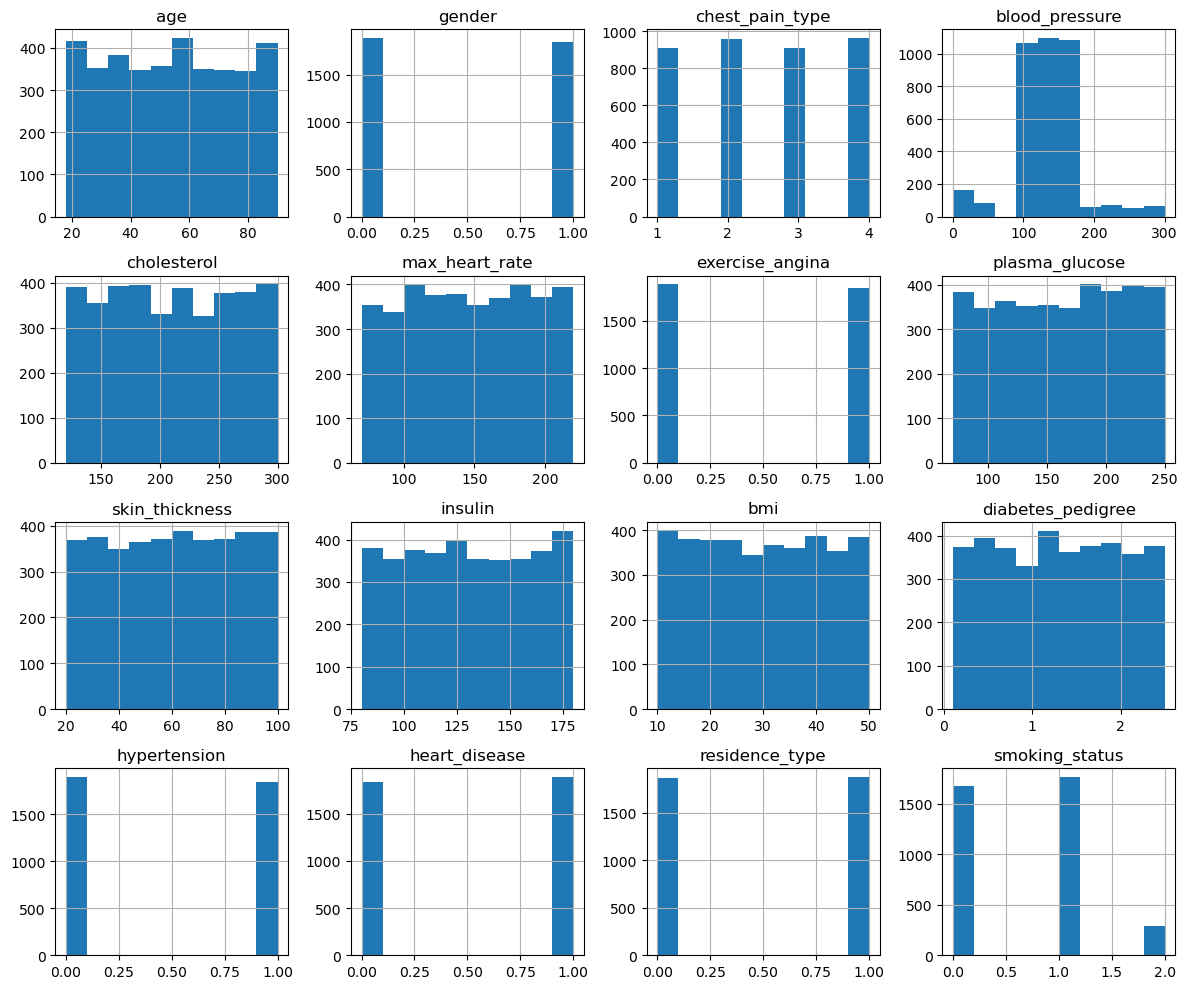

In [159]:
skewness = df.skew()
print("Skewness of each column:")
print(skewness)

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [160]:
scaler=StandardScaler()
x=scaler.fit_transform(df)

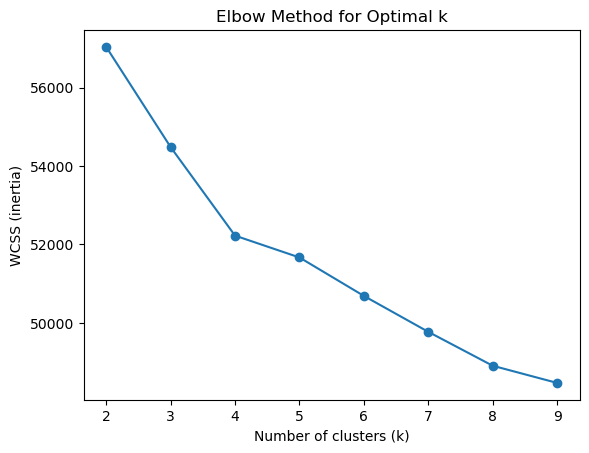

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [162]:
kmeans=KMeans(n_clusters=3,random_state=42)
res=[]
y_cluster=kmeans.fit_predict(x)
kmeanssilhouette = silhouette_score(x, y_cluster)
kmeansdb_index = davies_bouldin_score(x, y_cluster)
kmeans_ch = calinski_harabasz_score(x, y_cluster)
res.append([kmeanssilhouette,kmeansdb_index,kmeans_ch,kmeans.inertia_])
print("Silhouette Score:", kmeanssilhouette)
print("Davies-Bouldin Index:", kmeansdb_index)
print("calinski_harabasz_score:",kmeans_ch)

Silhouette Score: 0.0493738360061867
Davies-Bouldin Index: 3.916146508058759
calinski_harabasz_score: 180.04349659801449


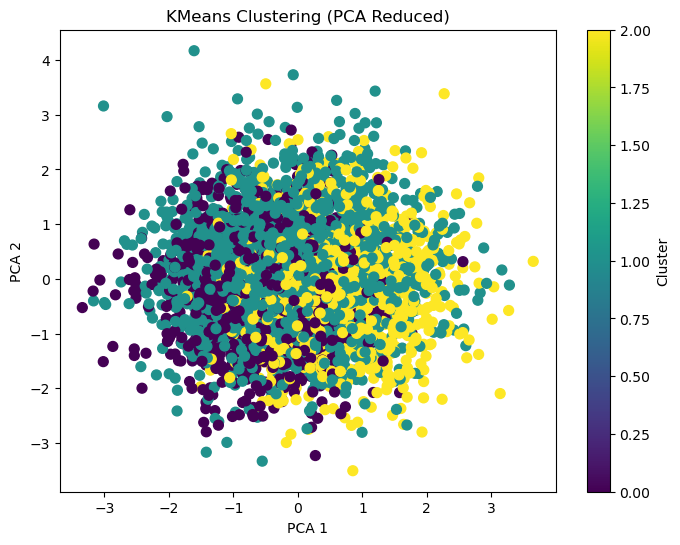

In [163]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],c=y_cluster, cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

<Figure size 800x500 with 0 Axes>

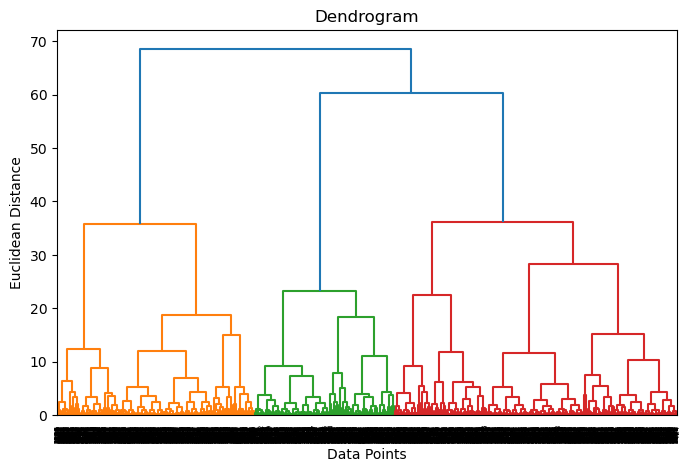

In [164]:
plt.figure(figsize=(8, 5))
dendrogram =plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show() 

Silhouette Score: 0.03523787085990517
Davies-Bouldin Index: 4.18816559708882
calinski_harabasz_score: 140.65619013693396


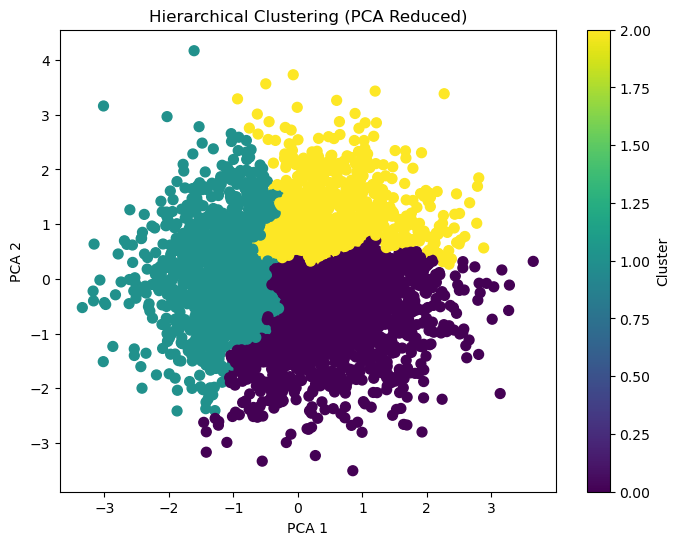

In [165]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X_pca)
hcsilhouette = silhouette_score(x, y_hc)
hcdb_index = davies_bouldin_score(x, y_hc)
hc_ch = calinski_harabasz_score(x, y_hc)
res.append([hcsilhouette,hcdb_index,hc_ch,np.nan])
print("Silhouette Score:", hcsilhouette)
print("Davies-Bouldin Index:", hcdb_index)
print("calinski_harabasz_score:",hc_ch)
# PCA 2D plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_hc, cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Hierarchical Clustering (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

Silhouette Score: 0.12932682528237005
Davies-Bouldin Index: 3.299156628125355
calinski_harabasz_score: 1.5818444861621115


C:\Users\Sakthi\AppData\Local\Temp\ipykernel_24108\1352545257.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


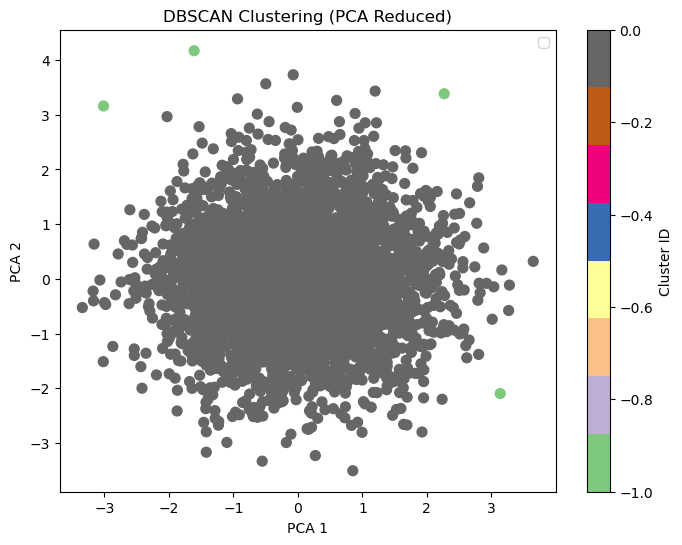

In [166]:
dbscan = DBSCAN(eps=0.7, min_samples=3)
y_db = dbscan.fit_predict(X_pca)
silhouette = silhouette_score(x, y_db)
db_index = davies_bouldin_score(x, y_db)
db_ch = calinski_harabasz_score(x, y_db)
res.append([silhouette,db_index,db_ch,np.nan])
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("calinski_harabasz_score:",db_ch)
# PCA 2D plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_db, cmap="Accent", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.colorbar(label="Cluster ID")
plt.show()

In [167]:
res_cleaned = [row[:3] for row in res]   # keep only first 3 values
dfs = pd.DataFrame(
    res_cleaned,
    columns=["silhouette_score", "davis_bouldin_score", "calinski_harabasz_score"],
    index=["KMeans", "Hierarchical", "DBSCAN"]
)
print(dfs)


              silhouette_score  davis_bouldin_score  calinski_harabasz_score
KMeans                0.049374             3.916147               180.043497
Hierarchical          0.035238             4.188166               140.656190
DBSCAN                0.129327             3.299157                 1.581844
